# Inicijalizacija parametara modela 


<center><img src="Images/V8_banner.png" width="700" height="700"/></center>


Tijekom optimizacije pokazano je da optimizator ovisi uvelike o broju epoha, stopi učenja $\alpha$, momentumu, ali i o početnim vrijednostima parametara modela $\Theta$. U ovoj vježbi istražiti će se nestajući gradijenti, eksplozija gradijenata, saturirani neuroni te utjecaj prevelike pristranosti i varijance.

---

### Važnost inicijalizacije težina

Prije nego što prijeđemo na Xavierov postupak inicijalizacije, važno je razumjeti zašto je inicijalizacija težina ključna u dubokom učenju.

#### 1. Nestajanje i eksplodiranje gradijenata
Problem **nestajanja gradijenata** pojavljuje se kada gradijenti tijekom treniranja postanu iznimno mali. Zbog toga mreža uči vrlo sporo ili uopće ne uči, što je osobito izraženo kod dubokih mreža.

Suprotno tome, kod **eksplodiranja gradijenata** vrijednosti gradijenata postaju vrlo velike, što dovodi do nestabilnog i neučinkovitog treniranja te može uzrokovati divergenciju modela.

Oba problema otežavaju ili potpuno onemogućuju uspješno treniranje dubokih neuronskih mreža.

---

#### 2. Problem prenaučenosti (overfitting)
Neuronske mreže, posebno duboke, imaju velik kapacitet za učenje vrlo složenih obrazaca iz podataka. Taj kapacitet, međutim, čini ih sklonima **prenaučenosti**.

Inicijalizacija težina ne sprječava izravno overfitting, ali **neizravno doprinosi** boljoj generalizaciji tako što modelu omogućuje da započne treniranje sa stabilno skaliranim težinama. Na taj se način smanjuju problemi poput nestajanja gradijenata i saturacije neurona.

---

#### 3. Saturacija aktivacijskih funkcija
**Saturacija** se događa kada izlaz aktivacijske funkcije postane vrlo blizak svom minimalnom ili maksimalnom mogućem iznosu za širok raspon ulaznih vrijednosti.

U tom stanju:
- aktivacijska funkcija postaje neosjetljiva na promjene ulaza  
- gradijent joj se približava nuli  
- učenje postaje sporo ili se potpuno zaustavlja  

Pravilnom inicijalizacijom težina osigurava se da početne aktivacije budu u uravnoteženom rasponu, što pomaže u izbjegavanju saturacije i problema s gradijentima.

---

# Inicijalizacija parametara

<font color='red'>


## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>
</font>

Parametre/težine na početku neuornske mreže je potrebno inicijalizirati. Navedite razloge koji su potenicjalni problemi pogrešne inicijalizacije parametara te kako se isti reflektiraju na broj epoha, stopu učenja optimizatora i konvergenciju/divergenciju neuronske mreže.

---

Inicjalizacija parametara neuronskih mreža tipično se vrši pomoću dviju metoda:

* **Xavier** (Golort) nazvana po autoru Xavieru Glorotu koji ju objavio u [znansvenom radu](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).
* **He** (Kaming) nazvana po autoru He Kammingu koji je je objavio u [znanstvenom radu](https://arxiv.org/abs/1502.01852)

---

## Xavier inicijalizacija

Xavier u svom radu istraživao je do tada široko prihvaćeno pravilo za inicijalizaciju težina neruonskih mreža odabirom slučajnih vrijednosti iz uniformne distribucije koja se kreće između -1 i 1. Nakon ove slučajne inicijalizacije, težine se zatim smanjuju za faktor 1 podijeljen s kvadratnim korijenom broja ulaznih jedinica (označenog kao 'n').

Cilj je riješiti problem održavanja varijance u prolasku neuronske mreže naprijed i natrag, posebno pri korištenju određenih aktivacijskih funkcija poput **hiperboličkog tangenta (tanh)** i **logističkog sigmoida**. Bez obzira na to koliko ulaznih veza neuron u sloju ima, varijanca njegovog izlaza trebala bi biti približno ista. Ovo svojstvo pomaže u sprječavanju problema nestajanja ili eksplozije gradijenta koji se može pojaviti ako se varijance drastično promijene između slojeva. Slično tome, varijanca gradijenta tijekom propagacije unatrage također bi trebala biti otprilike konstantna bez obzira na broj neurona u sljedećem sloju. To pomaže u održavanju stabilne dinamike učenja.

U Xavierovoj inicijalizaciji, ključni faktor je **broj ulaza i izlaza u slojevima**, a ne toliko metoda randomizacije. Cilj je održati varijancu u granicama koje omogućuju učinkovito učenje s različitim aktivacijskim funkcijama. Postoje dvije inačice Xavier inicijalizacije:

---

#### Uniformna Xavier inicijalizacija
Težine možemo inicijalizirati tako da ih generiramo iz uniformne distribucije unutar specifičnog raspona koji se određuje formulom:

\begin{align}
x = \sqrt{\frac{6}{n_{\text{inputs}} + n_{\text{outputs}}}}
\end{align}

U kojoj se $x$ računa pomoću naveden formule, $n_inputs$ je broj neurona u ulaznom sloju, dok je $n_outputs$ broj neurona u izlaznom sloju. Za svaku težinu $w$ u sloju uzrokuje se slučajna vrijednost iz unifromne distribucije $w \in [-x, x]$. Ovim ograničavanjem težina kontrolira se varijanca početnih težina.

---

#### Normalna Xavier inicijalzacija
Ova inicijalizacija postavlja početne težine uzorkovanjem vrijednosti iz normalne distribucije sa srednjom vrijednošću $\mu = 0$ i standardnom devijacijom određenom formulom:

\begin{align}
\sigma = \sqrt{\frac{2}{n_{\text{inputs}} + n_{\text{outputs}}}}
\end{align}

gdje se $\sigma$ računa pomoću navedene formule, $n_inputs$ je broj neurona u ulaznom sloju, dok je $n_outputs$ broj neurona u izlaznom sloju. Drugim riječima $w = \mathcal{N}(\mu, \sigma)$. Odabir između normalne i unifomne Xavier inicijalzacije ovisi o arhitekturi neuronske mreže i korištenim aktiviacijskim funkcijama. 

---

#### Kada koristiti koju?

Načelno, i nema prevelike razlike osim u ReLU i LeakyReLU!

| Aktivacijska funkcija | Preporučena inicijalizacija | Objašnjenje |
|------------------------|------------------------------|-------------|
| **tanh**               | **Xavier Uniform**           | Najstabilnije, manje ekstremne vrijednosti. |
| **sigmoid**            | **Xavier Uniform**           | Stabilizira varijancu, izbjegava saturaciju. |
| **softmax (ulazi)**    | **Xavier Uniform**           | Dobro radi za klasifikacijske slojeve. |
| **Linear (bez aktivacije)** | Xavier Uniform ili Xavier Normal | Obje opcije su dobre, Uniform nešto stabilniji. |
| **tanh / sigmoid (specifični modeli npr. VAE decoder, Difuzija)** | **Xavier Normal** | Gaussian distribucija poželjna zbog modeliranja šuma. |
| **ReLU**               | ❌ Ne Xavier → ✔️ **Kaiming/He** | Xavier daje premalu varijancu za ReLU. |
| **LeakyReLU / ELU**    | ❌ Ne Xavier → ✔️ **Kaiming/He** | Isto kao i ReLU – potrebna veća varijanca. |


## Kaming He inicijalizacija

Kaiming inicijalizacija, poznata i kao *Kaiming He inicijalizacija* ili *He normal inicijalizacija*, tehnika je inicijalizacije težina u umjetnim neuronskim mrežama. Ovu su metodu predstavili Kaiming He, Xiangyu Zhang, Shaoqing Ren i Jian Sun u radu: **"Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification"**

Glavna motivacija Kaiming inicijalizacije jest rješavanje problema **nestajanja** ili **eksplodiranja gradijenata** koji se mogu pojaviti tijekom treniranja dubokih neuronskih mreža. U dubokim mrežama, posebno onima koje koriste **ReLU** aktivacijsku funkciju, tradicionalne metode inicijalizacije (npr. nasumična normalna ili Xavier inicijalizacija) mogu uzrokovati da gradijenti nestanu ili eksplodiraju tijekom propagacije unatrag.

Kaiming inicijalizacija definira težine kao slučajne brojeve iz normalne (Gaussove) distribucije:

\begin{align}
W \sim \mathcal{N}\left(0, \frac{2}{n}\right)
\end{align}

gdje je $n$ broj ulaznih neurona u sloj. Faktor 2 u varijanci posebno je prilagođen za ReLU aktivaciju. Za druge aktivacijske funkcije (npr. sigmoid, tanh) prikladnije su druge strategije inicijalizacije.


#### Prednosti

Kroz detaljitu analizu svojstava ReLU funkcije i izazova koje predstavljaju nestajući i eksplodirajući gradijenti, Kaiming He i njegove kolege osmislili su metodu inicijalizacije koja je postala kamen temeljac za inicijalizaciju težina u dubokim neuronskim mrežama. **Prednosti Kaimingove metode inicijalizacije su:**

* **Ublažavanje problema nestajućih i eksplodirajućih gradijenata:**  
  Kaiming He inicijalizacija pomaže ublažiti probleme nestajućih i eksplodirajućih gradijenata koji mogu otežati treniranje dubokih mreža. (Xavier isto)

* **Očuvanje varijance:**  
  Metoda inicijalizacije osmišljena je tako da očuva varijancu težina, osobito tijekom propagacije unaprijed. To pomaže zadržati odgovarajuću skalu aktivacija kroz slojeve, sprječavajući pojavu presitnih ili prevelikih vrijednosti. (Xavier isto)

* **Učinkovito treniranje dubljih mreža:**  
  Pokazalo se da Kaiming He inicijalizacija doprinosi učinkovitijem treniranju dubljih mreža. Duboke neuronske mreže s mnogo slojeva mogu imati koristi od ove metode inicijalizacije kako bi se osiguralo djelotvorno propagiranje informacija i gradijenata kroz mrežu.

* **Prilagođenost ReLU aktivacijskoj funkciji:**  
  Kaiming He inicijalizacija prilagođena je ReLU aktivacijskim funkcijama, koje se široko koriste u dubokom učenju. U obzir uzima karakteristike ReLU-a, poput ne-saturacije za pozitivne ulaze, kako bi postavila odgovarajuće početne težine.

* **Empirijski uspjeh na raznim zadacima:**  
  Empirijske studije dosljedno su pokazale učinkovitost Kaiming He inicijalizacije u raznim zadacima računalnog vida i obrade prirodnog jezika. Postala je jedna od najčešće korištenih strategija inicijalizacije među praktičarima koji rade s dubokim neuronskim mrežama.


---

## Nestajući gradijenti

**Nestajući gradijent** (*vanishing gradient*) je problem u dubokim neuronskim mrežama koji nastaje kada tijekom **propagacije prema unatrag** gradijenti postanu izrazito mali.

Posljedica nestajućeg gradijenta je:

* vrlo sporog učenja u ranim slojevima  
* gotovo nikakve promjene težina
* nemogućnosti mreže da nauči dublje obrasce  

Najčešći uzrok su aktivacijske funkcije poput **sigmoida** ili **tanh**, koje “stišću” vrijednosti u uzak raspon. Kada se to ponavlja kroz mnogo slojeva, gradijenti postupno postaju gotovo nula.


---

## Eksplodirajući gradijenti

**Eksplodirajući gradijenti** (*exploding gradients*) su problem u dubokim neuronskim mrežama kada tijekom **propagacije prema unatrag** gradijenti postanu **preveliki**.

To uzrokuje:

* nagle, nestabilne promjene težina  
* “skakanje” modela po prostoru rješenja  
* nemogućnost konvergencije tijekom treniranja  
* ponekad i numeričke greške (npr. `NaN` vrijednosti)

Do eksplodirajućih gradijenata najčešće dolazi u vrlo dubokim mrežama ili u rekurentnim neuronskim mrežama (RNN), gdje se gradijenti multipliciraju kroz mnogo koraka, pa mogu narasti do ekstremno velikih vrijednosti.

---

## Zasićeni neuroni

**Zasićeni neuroni** (*saturated neurons*) pojavljuju se kada je izlaz neurona “zapeo” u području gdje se aktivacijska funkcija gotovo ne mijenja — najčešće na svojim **gornjim ili donjim granicama**.

To dovodi do:

- **gradijenti postaju gotovo nula** → neuron prestaje učiti  
- vrlo spore ili nikakve promjene težina  
- gubitka sposobnosti mreže da modelira složene obrasce  
- usporenog ili blokiranog treniranja u dubokim mrežama

Zasićenje se najčešće događa kod aktivacijskih funkcija **sigmoid** i **tanh**, jer imaju “ravne” krajeve.  
Kada ulaz padne u ta ravna područja, derivacija je gotovo nula — pa neuron ne šalje korisne gradijente unatrag.

---

<font color='green'>


## Primjer

<left><img src="Images/Primjer.png" width="70" height="70"/></left>

</font>

Primjeri navedenih problema dati će se na skupu podataka **MNIST** koji je dostupan na idućoj [poveznici](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). Ukratko, za slike znamenki od 0 do 9 potrebno je predvdjeti koja je znamenka nacrtana na slici. 

Slike su male - dimenzija $28\times28$ što omogućuje da se slika "spljošti" u jedan niz brojeva te se koristi poptpuno povezana neuronska mrežu sa 10 predikcijskih neurona -- po jedan za svaku klasu.

Kao optimizator se koristi **Adam**, dok je funkcija cilja **unakrsna entropija**.

Idući proramski kod kreira skup podataka, i stvara model prema zadanim parametrima. Proučite programski kod te razmislite zašto smo podijelili skup podataka u podskupove **Train**, **Valid** i **Test**.

Train: 54000, Valid: 6000, Test:10000


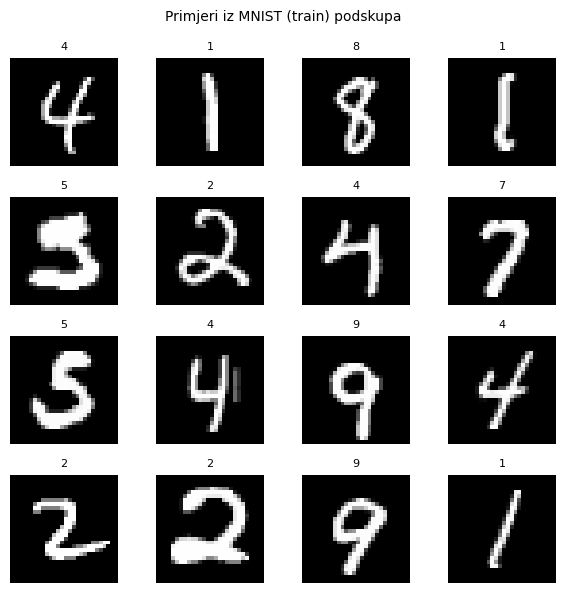

In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Učitavanje programskih knjižnica
from Skripte.Vjezba8.dataloader import mnist_dataset

# Kreiranje skupova podataka
_train_dataset = mnist_dataset(subset = "train")
_valid_dataset = mnist_dataset(subset = "valid")
_test_dataset = mnist_dataset(subset = "test")

# Broj elemenata
print(f"Train: {len(_train_dataset)}, Valid: {len(_valid_dataset)}, Test:{len(_test_dataset)}")

_train_dataset.visualise()


In [2]:
# Učitavanje programskih knjižica
from Skripte.Vjezba8.models import DeepMLPNet, print_model_summary

## Model
_model = DeepMLPNet(
    input_dim=28*28,
    hidden_dim=256,
    num_layers=5,
    num_classes=10,
    init_scale=0.01,        
    activation="sigmoid",         
    init_type="xavier_uniform",   
    init_constant_value=0.05,     
)

# Ispis modela
print_model_summary(_model, input_dim= (32,28*28))


Layer (type (var_name))                  Input Shape      Output Shape     Param #          Trainable
DeepMLPNet (DeepMLPNet)                  [32, 784]        [32, 10]         --               True
├─ModuleList (hidden_layers)             --               --               --               True
│    └─Linear (0)                        [32, 784]        [32, 256]        200,960          True
│    └─Linear (1)                        [32, 256]        [32, 256]        65,792           True
│    └─Linear (2)                        [32, 256]        [32, 256]        65,792           True
│    └─Linear (3)                        [32, 256]        [32, 256]        65,792           True
│    └─Linear (4)                        [32, 256]        [32, 256]        65,792           True
├─Linear (output_layer)                  [32, 256]        [32, 10]         2,570            True
Total params: 466,698
Trainable params: 466,698
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 14.93
Input siz

---

<font color='red'>


## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Sljedeći programski kod omogućuje podešavanje brojnih parametara treninga modela koji se inače zadaju konfiguracijskim datotekama. Parametri koji se mogu mijenjati su redom:

- **Hidden dim** – broj neurona u svakom skrivenom sloju.
- **# slojeva (num_layers)** – koliko skrivenih slojeva ima mreža.
- **# epoha (num_epochs)** – broj prolazaka kroz cijeli trening skup.
- **Init scale** – dodatno skaliranje inicijaliziranih težina (npr. 1.0, 0.1, 0.01).
- **Aktivacija (activation)** – odabir aktivacijske funkcije: sigmoid, relu, tanh.
- **Init tip (init_type)** – tip inicijalizacije težina: xavier_uniform, xavier_normal, kaiming_uniform, zeros, constant.
- **Const val (init_constant_value)** – vrijednost težina ako je init_type="constant".
- **LR (learning_rate)** – learning rate Adam optimizatora.
- **Train BS (train_batch_size)** – veličina batcha za treniranje.
- **Valid ratio** – udio validacijskog skupa (npr. 0.1 = 10%).
- **Max batch/ep** – maksimalan broj batch-eva po epohi (radi ubrzavanja).

Vaš je zadatak odgovoriti na sljedeća pitanja:

* Odredite kojem scenariju pripada trening/model sa sljedećem parametrima:
    - `hidden_dim = 256`
    - `# slojeva = 10`
    - `Init scale = 0.01`
    - `Aktivacija = "sigmoid"`
    - `Init tip = "xavier_uniform"`
    - `Const val = 0.01`
    - `# epoha = 8`
    - `LR = 1e-3`
    - `Train BS = 150`
    - `Valid ratio = 0.10`
    - `Max batch = 150`

* Odredite kojem scenariju pripada trening/model sa sljedećem parametrima:
    - `hidden_dim = 256`
    - `# slojeva = 15`
    - `Init scale = 10.0`         
    - `Aktivacija = "relu"`
    - `Init tip = "xavier_normal"`
    - `Const val = 0.01`          
    - `# epoha = 15`              
    - `LR = 1e-2`                 
    - `Train BS = 150`            
    - `Valid ratio = 0.10`
    - `Max batch = 150`

* Što će se dogoditi ako su sve vrijednosti inicijalizirane na $0$ ili konstantna vrijednost $0.05$. Ponudite odgovor zašto se dešava navedeni scenarij. Postavke modela su sljedeće:

    - `hidden_dim = 256`
    - `# slojeva = 8`
    - `Init scale = 0.001`         
    - `Aktivacija = "relu"`
    - `Init tip = "zeros" ili "constant`
    - `Const val = 0.05`          
    - `# epoha = 8`              
    - `LR = 1e-3`                 
    - `Train BS = 150`            
    - `Valid ratio = 0.10`
    - `Max batch = 150`

* Koja aktivacijska funkcija lakše podlježe nestajućim gradijentima, a koja eksploziji gradijenata i zašto?

* Podesite parametre neuronske mreže tako da ostvarite preciznost F1-Score-a preko $90\%$ koristeći a) Sigmoid, b) learning rate $0.1$, c) samo jedan sloj. Steknite iskustvo podešavanja parametara i odgovorite kako svaki od parametara utječe na trening neuronske mreže.

In [3]:
# Autoreload
%load_ext autoreload
%autoreload 2
# Učitavanje programskih knjižica
from Skripte.Vjezba8.widget import deep_mlp_training_widget

_ui = deep_mlp_training_widget()
_ui

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

## Pristranost i varijanca

U scenariju **visoke pristranosti (high bias)** model ima premali kapacitet i ne može naučiti osnovne obrasce u podacima.  
Na grafu se vidi da **funkcije gubitka nad traning i nad validacijskim skupom podataka visoki**, te da se smanjuju sporo i gotovo paralelno.  
To znači da model *podjednako loše generalizira i na trening i na validiacijskom skup*, što je tipični znak **underfittinga**.

S druge strane, u scenariju **visoke varijance (high variance)** model ima prevelik kapacitet i previše se prilagodi treninging podacima.  
Na grafu se vidi **da funkcija gubitka nad trainining skupu podataka opada**, dok se **na validacijskom skupu nakon određenog broja epoha počinje povećavati**. To znači da je model naučio detalje i šum iz skupa za treniranje, ali loše **generalizira** na neviđenim primjerima – tipičan znak **overfittinga**.

| Svojstvo                     | Visoka pristranost (High Bias)                         | Visoka varijanca (High Variance)                          |
|------------------------------|----------------------------------------------------------|------------------------------------------------------------|
| Treniranje (Train loss)      | Visok i sporo opada                                      | Vrlo nizak, često ide gotovo do 0                          |
| Validacija (Valid loss)      | Visok, vrlo sličan train lossu                           | Početno se smanjuje, a zatim **raste**                     |
| Razlika train–valid          | Mala                                                     | Velika                                                     |
| Generalizacija               | Loša (model preslab)                                     | Loša (model prejak)                                       |
| Kapacitet modela             | Prenizak (too simple)                                    | Previsok (too complex)                                     |
| Tipični uzrok                | Malo slojeva, malo neurona, prekratko treniranje         | Mnogi slojevi, mnogo neurona, predugo treniranje           |
| Tipična posljedica           | **Underfitting**                                         | **Overfitting**                                            |


---

<font color='red'>


## Zadatak

<left><img src="Images/Zadatak.png" width="70" height="70"/></left>

</font>

Za slijdeće dvije neuronske mreže sa proučite koja demonstrira slučaj visoke pristranosti, a koje visoke varijance. Pokušajte postići iste scenarije pomoću drugih parametara, primijerice mijenjajte veličinu skupa podataka.

Mreža 1.:
- `hidden_dim = 4`
- `# slojeva = 2`
- `Init scale = 1.0`         
- `Aktivacija = "relu"`
- `Init tip = "Kaiming`
- `Const val = 0.05`          
- `# epoha = 30`              
- `LR = 1e-3`                 
- `Train BS = 150`            
- `Valid ratio = 0.10`
- `Max batch = 150`

Mreža 2.:
- `hidden_dim = 300`
- `# slojeva = 20`
- `Init scale = 1.0`         
- `Aktivacija = "relu"`
- `Init tip = "Kaiming`
- `Const val = 0.05`          
- `# epoha = 30`              
- `LR = 1e-3`                 
- `Train BS = 150`            
- `Valid ratio = 0.10`
- `Max batch = 150`


In [4]:
# Autoreload
%load_ext autoreload
%autoreload 2
# Učitavanje programskih knjižica
from Skripte.Vjezba8.widget import deep_mlp_training_widget

_ui = deep_mlp_training_widget()
_ui

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
